In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
base_dir = '/kaggle/input/emotion-recognition-dataset/dataset'
categories = ['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [3]:
data = []
labels = []

In [4]:
for category in categories:
    folder_path = os.path.join(base_dir, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (64, 64))
        data.append(image)
        labels.append(categories.index(category))

In [5]:
data = np.array(data).reshape(-1, 64, 64, 1)/255.0
labels = np.array(labels)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1)

In [7]:
import tensorflow as tf

2024-05-25 08:33:44.977961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 08:33:44.978077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 08:33:45.103603: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
# !pip install tensorflow

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
datagen.fit(x_train)

In [12]:
datagen.fit(x_test)

In [13]:
# x_test

In [14]:
cnn = tf.keras.models.Sequential()

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64, 64, 1)))
cnn.add(tf.keras.layers.MaxPool2D((2, 2)))
cnn.add(tf.keras.layers.Dropout(0.25))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (64, 64, 1)))
cnn.add(tf.keras.layers.MaxPool2D((2, 2)))
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', input_shape = (64, 64, 1)))
cnn.add(tf.keras.layers.MaxPool2D((2, 2)))
cnn.add(tf.keras.layers.Dropout(0.25))

In [18]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 120, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units = 6, activation = 'softmax'))

In [19]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       553,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,478 (2.47 MB)

 Trainable params: 646,478 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2024-05-25 08:34:01.860142: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3844: 3.50622, expected 2.90338
2024-05-25 08:34:01.860189: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3845: 2.89383, expected 2.29098
2024-05-25 08:34:01.860198: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3846: 2.45266, expected 1.84981
2024-05-25 08:34:01.860207: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3847: 3.22924, expected 2.6264
2024-05-25 08:34:01.860215: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3848: 3.88833, expected 3.28549
2024-05-25 08:34:01.860223: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3849: 4.2225, expected 3.61966
2024-05-25 08:34:01.860231: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3850: 3.66357, expected 3.06072
2024-05-25 08:34:01.860240: E extern

 39/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2241 - loss: 1.7294

I0000 00:00:1716626046.139519      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2726 - loss: 1.6502

2024-05-25 08:34:13.834590: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.7144, expected 1.41043
2024-05-25 08:34:13.834648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 1.73872, expected 1.43476
2024-05-25 08:34:13.834663: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 2.03006, expected 1.7261
2024-05-25 08:34:13.834680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 1.98496, expected 1.681
2024-05-25 08:34:13.834693: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 42: 1.75918, expected 1.45522
2024-05-25 08:34:13.834706: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 53: 1.7415, expected 1.43753
2024-05-25 08:34:13.834718: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 54: 1.74983, expected 1.44587
2024-05-25 08:34:13.834728: E external/local_xla/xla/se

310/310 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.2727 - loss: 1.6499 - val_accuracy: 0.4282 - val_loss: 1.3635
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4312 - loss: 1.3859 - val_accuracy: 0.5241 - val_loss: 1.1759
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4690 - loss: 1.2852 - val_accuracy: 0.5625 - val_loss: 1.0959
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5109 - loss: 1.1941 - val_accuracy: 0.5754 - val_loss: 1.0438
Epoch 5/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5543 - loss: 1.1052 - val_accuracy: 0.6203 - val_loss: 0.9967
Epoch 6/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5704 - loss: 1.0337 - val_accuracy: 0.5718 - val_loss: 1.0138
Epoch 7/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5193 - loss: 1.1873 - val_accuracy: 0.6057 - val_loss: 1.1236
Epoch 8/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5565 - loss: 1.0949 - val_accuracy: 0.6284 - va

In [22]:
history = cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6245 - loss: 0.9133 - val_accuracy: 0.6357 - val_loss: 0.9869
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5296 - loss: 1.1628 - val_accuracy: 0.6256 - val_loss: 1.0291
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6318 - loss: 0.9139 - val_accuracy: 0.6361 - val_loss: 0.8996
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5814 - loss: 1.0273 - val_accuracy: 0.6429 - val_loss: 0.9384
Epoch 5/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6476 - loss: 0.8815 - val_accuracy: 0.6438 - val_loss: 0.9364
Epoch 6/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6103 - loss: 0.9327 - val_accuracy: 0.6644 - val_loss: 0.9515
Epoch 7/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6219 - loss: 0.9359 - val_accuracy: 0.6510 - val_loss: 0.9181
Epoch 8/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6182 - loss: 0.9470 - val_accuracy: 0.

In [23]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

87/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7009 - loss: 0.7873

2024-05-25 08:34:41.513791: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.93965, expected 2.43046
2024-05-25 08:34:41.513854: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.49797, expected 2.98878
2024-05-25 08:34:41.513869: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.8939, expected 2.38471
2024-05-25 08:34:41.513879: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.17464, expected 1.66545
2024-05-25 08:34:41.513891: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.73179, expected 2.2226
2024-05-25 08:34:41.513902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.26928, expected 2.76009
2024-05-25 08:34:41.513913: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.66209, expected 2.1529
2024-05-25 08:34:41.513923: E external/local_xla/xla/servi

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6995 - loss: 0.7978
Test accuracy: 0.6845681071281433


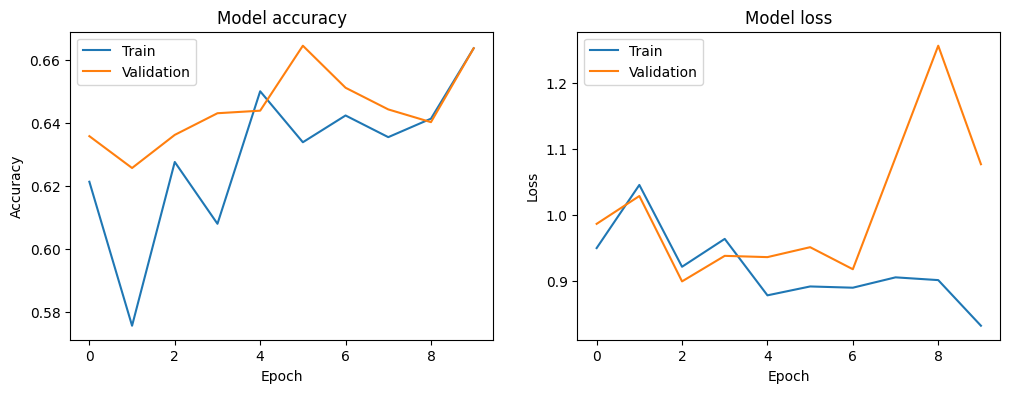

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [25]:
import cv2
import numpy as np

def load_and_preprocess_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 48x48 pixels
    image = cv2.resize(image, (64, 64))
    # Normalize the image
    image = image / 255.0
    # Reshape the image to match the model input shape (1, 48, 48, 1)
    image = image.reshape(1, 64, 64, 1)
    return image

def predict_emotion(image_path):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    # Predict the emotion
    predictions = cnn.predict(image)
    # Get the index of the highest probability
    predicted_index = np.argmax(predictions)
    # Get the corresponding emotion label
    predicted_emotion = categories[predicted_index]
    return predicted_emotion

# Path to the specific image
image_path = '/kaggle/input/emotion-recognition-dataset/dataset/Ahegao/cropped_emotions.16023~ahegao.png'

# Predict the emotion
predicted_emotion = predict_emotion(image_path)
print(f'The predicted emotion is: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
The predicted emotion is: Neutral
